# Chapter 4. Auto-Regressive Models

## Chapter 4: Auto-Regressive (AR)

In [26]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [27]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

In [13]:
# Number of samples
n = 600

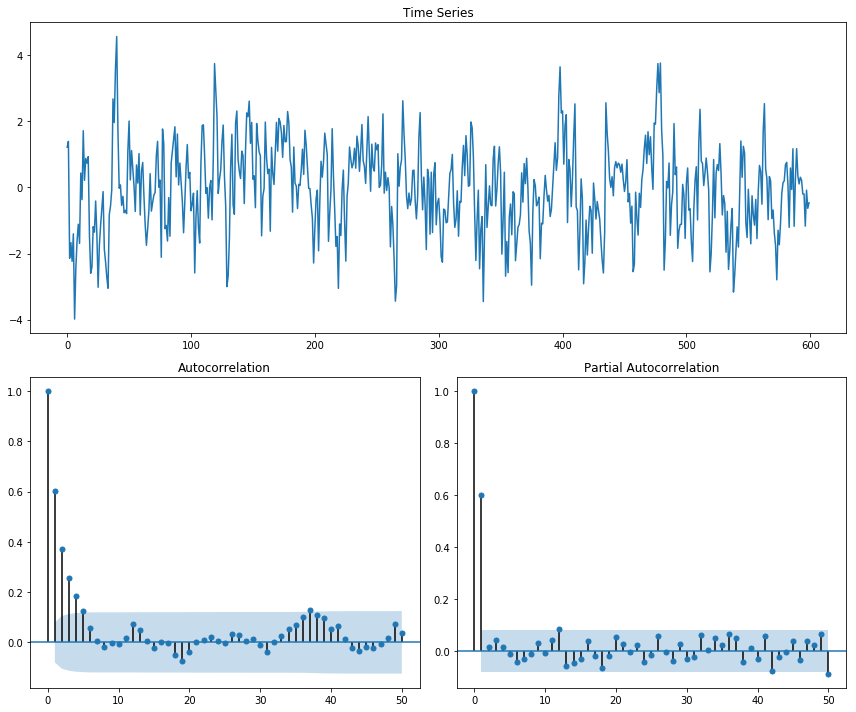

In [14]:
# Generate AR(1) dataset
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

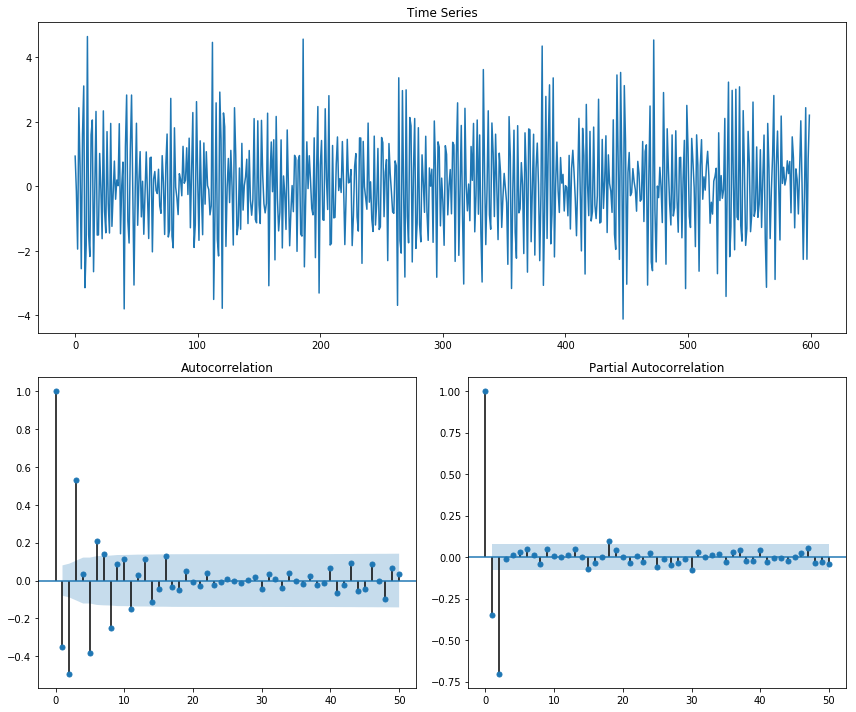

In [15]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

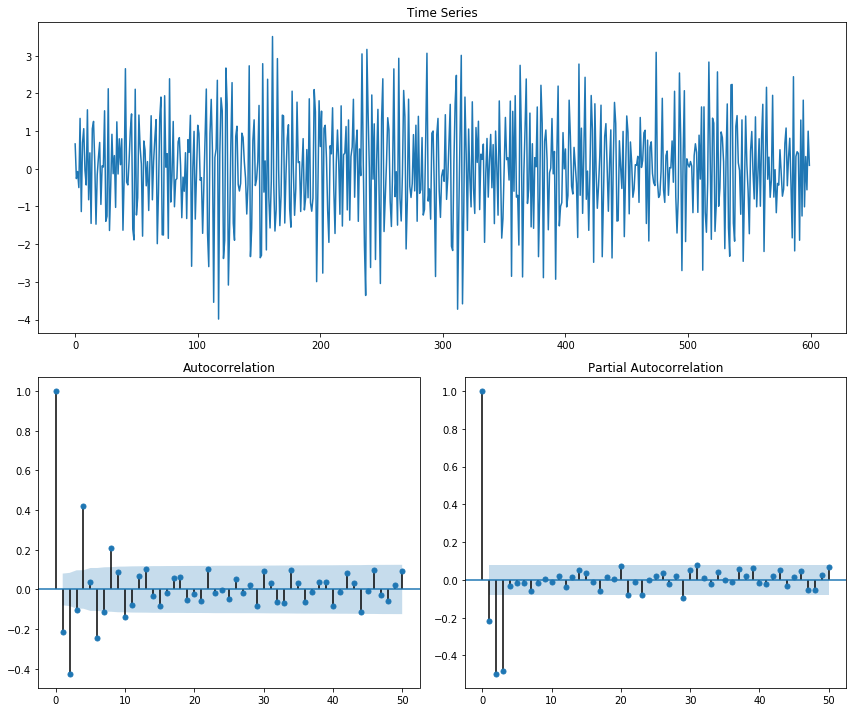

In [16]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

In [17]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -882.770
Method:                           mle   S.D. of innovations              1.053
Date:                Tue, 07 May 2019   AIC                           1769.541
Time:                        17:01:46   BIC                           1778.335
Sample:                             0   HQIC                          1772.964
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.6011      0.033     18.453      0.000       0.537       0.665
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6635           +0.0000j            1.6635            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
# Build AR(2) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(2, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(2, 0)   Log Likelihood                -882.667
Method:                           mle   S.D. of innovations              1.053
Date:                Tue, 07 May 2019   AIC                           1771.334
Time:                        17:01:53   BIC                           1784.525
Sample:                             0   HQIC                          1776.469
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.5900      0.041     14.469      0.000       0.510       0.670
ar.L2.y        0.0186      0.041      0.455      0.649      -0.061       0.099
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.6131           +0.0000j            1.6131            0.0000
AR.2          -33.3957           +0.0000j           33.3957            0.5000
-----------------------------------------------------------------------------
"""

In [19]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -851.756
Method:                           mle   S.D. of innovations              0.999
Date:                Tue, 07 May 2019   AIC                           1711.512
Time:                        17:01:55   BIC                           1729.100
Sample:                             0   HQIC                          1718.359
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.5611      0.036    -15.686      0.000      -0.631      -0.491
ar.L2.y       -0.6490      0.033    -19.616      0.000      -0.714      -0.584
ar.L3.y       -0.4793      0.036    -13.437      0.000      -0.549      -0.409
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0732           -1.1769j            1.1792           -0.2401
AR.2            0.0732           +1.1769j            1.1792            0.2401
AR.3           -1.5005           -0.0000j            1.5005           -0.5000
-----------------------------------------------------------------------------
"""

## Chapter 4. Moving Average (MA)

In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [3]:
# Number of samples
n = 600

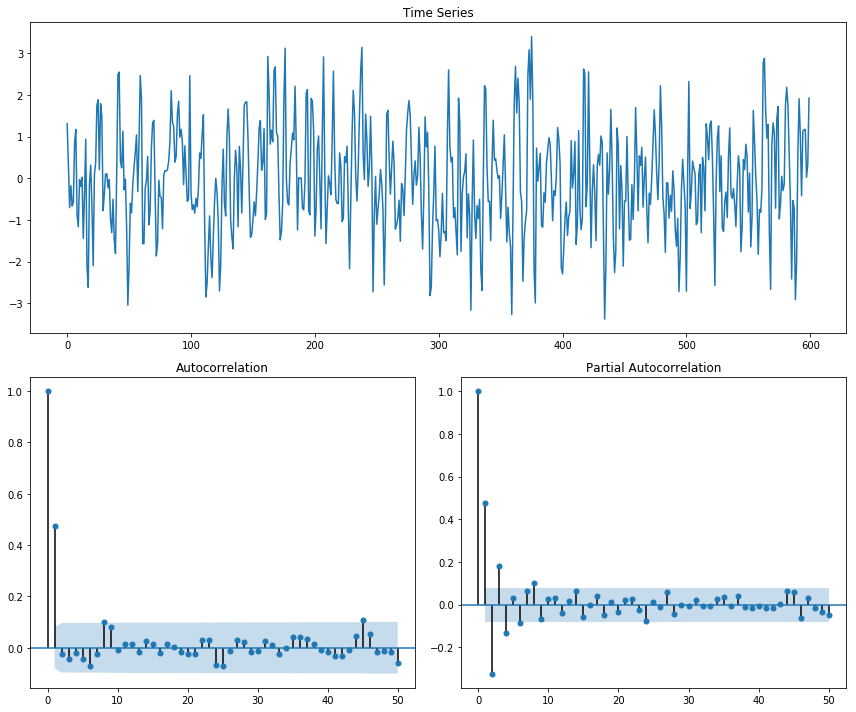

In [4]:
# Generate MA(1) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma1_data)

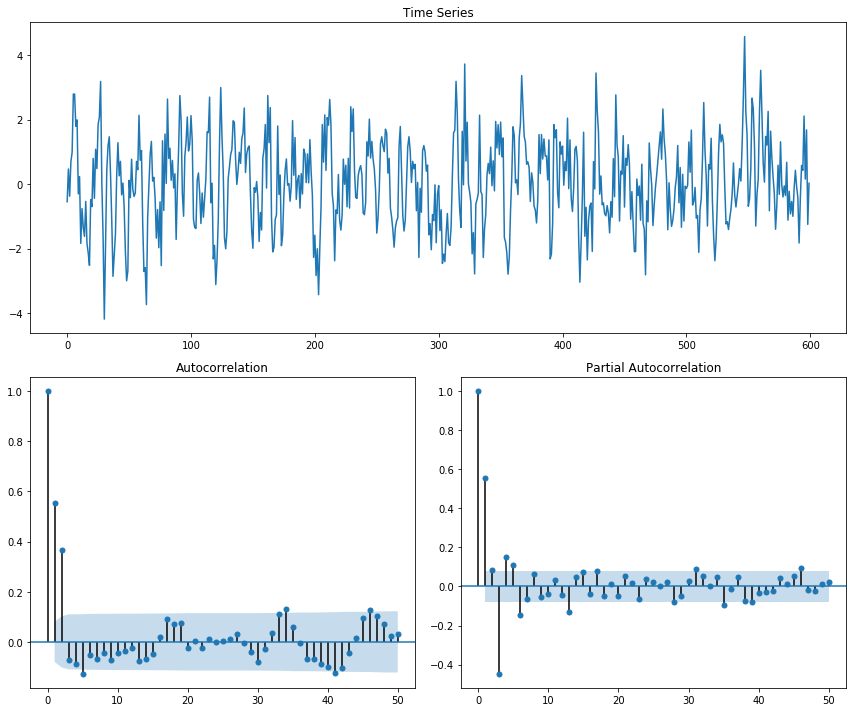

In [5]:
# Generate MA(2) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma2_data)

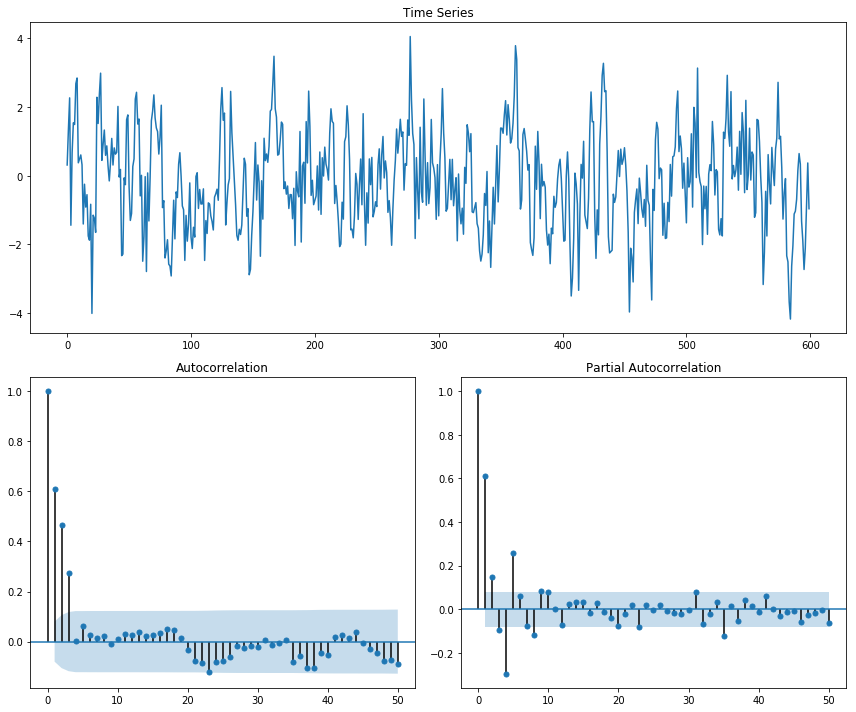

In [6]:
# Generate MA(3) dataset
ar = np.r_[1, -0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ma3_data)

In [8]:
# Build MA(1) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -857.393
Method:                           mle   S.D. of innovations              1.010
Date:                Tue, 07 May 2019   AIC                           1718.787
Time:                        16:59:50   BIC                           1727.580
Sample:                             0   HQIC                          1722.210
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6824      0.027     25.641      0.000       0.630       0.735
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.4655           +0.0000j            1.4655            0.5000
-----------------------------------------------------------------------------
"""

In [9]:
# Build MA(2) model
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 2)).fit(
    maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 2)   Log Likelihood                -856.428
Method:                           mle   S.D. of innovations              1.008
Date:                Tue, 07 May 2019   AIC                           1718.857
Time:                        16:59:59   BIC                           1732.047
Sample:                             0   HQIC                          1723.992
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7282      0.043     16.857      0.000       0.644       0.813
ma.L2.y        0.0585      0.042      1.395      0.164      -0.024       0.141
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.5715           +0.0000j            1.5715            0.5000
MA.2          -10.8859           +0.0000j           10.8859            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
# Build MA(3) model
ma3 = smtsa.ARMA(ma3_data.tolist(), order=(0, 3)).fit(
    maxlag=30, method='mle', trend='nc')
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 3)   Log Likelihood                -843.069
Method:                           mle   S.D. of innovations              0.985
Date:                Tue, 07 May 2019   AIC                           1694.139
Time:                        17:00:09   BIC                           1711.726
Sample:                             0   HQIC                          1700.985
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6164      0.038     16.421      0.000       0.543       0.690
ma.L2.y        0.6671      0.036     18.315      0.000       0.596       0.738
ma.L3.y        0.5470      0.036     15.112      0.000       0.476       0.618
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            0.0756           -1.1525j            1.1549           -0.2396
MA.2            0.0756           +1.1525j            1.1549            0.2396
MA.3           -1.3705           -0.0000j            1.3705           -0.5000
-----------------------------------------------------------------------------
"""

## Chapter 4: Auto-Regressive Moving Average (ARMA)

In [20]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
from statsmodels.tsa import arima_process

In [21]:
# Number of samples
n = 600

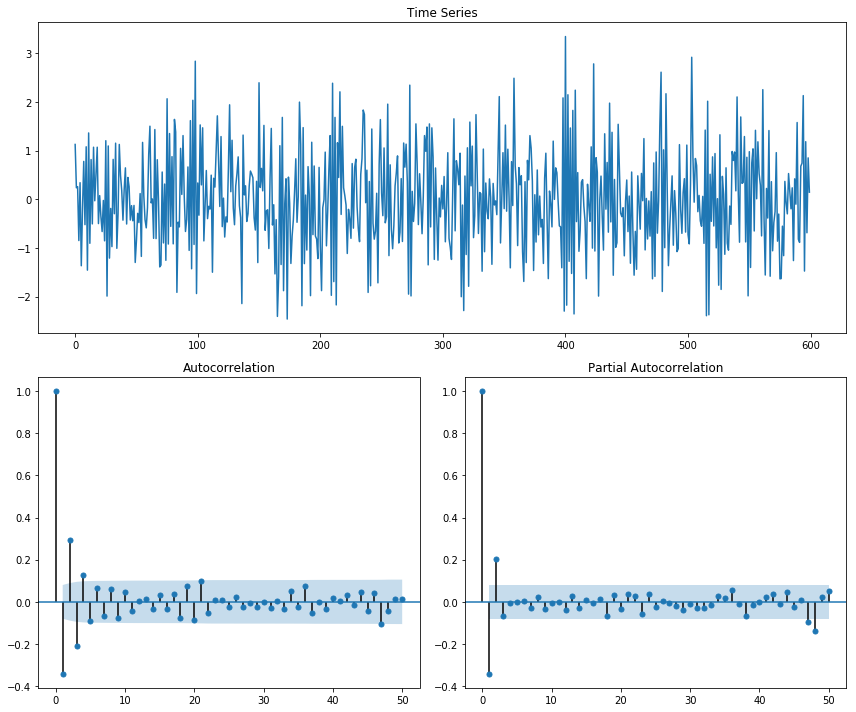

In [22]:
# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1ma1_data )

Text(0.5, 0, 'Lag')

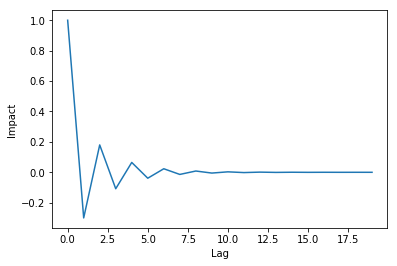

In [23]:
# Impluse response curve
plt.plot(arima_process.arma_impulse_response(ar, ma, nobs=20))
plt.ylabel("Impact")
plt.xlabel("Lag")

In [24]:
# Build AR(1) model
ar1ma1 = smtsa.ARMA(ar1ma1_data.tolist(), order=(1, 1)).fit(
    maxlag=30, method='mle', trend='nc')
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 1)   Log Likelihood                -826.852
Method:                           mle   S.D. of innovations              0.960
Date:                Tue, 07 May 2019   AIC                           1659.704
Time:                        17:03:52   BIC                           1672.895
Sample:                             0   HQIC                          1664.839
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.7592      0.057    -13.253      0.000      -0.871      -0.647
ma.L1.y        0.4823      0.076      6.345      0.000       0.333       0.631
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3172           +0.0000j            1.3172            0.5000
MA.1           -2.0732           +0.0000j            2.0732            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARMA(ar1ma1_data.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])

aicVal

[[1, 1, 1659.7037486790707],
 [1, 2, 1659.7146726551464],
 [2, 1, 1659.8639023020157],
 [2, 2, 1661.7000140363677]]

### IBM Example Auto-Regressive Moving Average (ARMA)

In [31]:
# Load modules 
from __future__ import print_function
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.api as sm
import os

In [32]:
# Load Dataset
ibm_df = pd.read_csv('ibm-common-stock-closing-prices copy.csv')
ibm_df.head()

,Date,IBM common stock closing prices
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


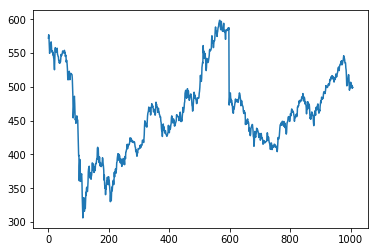

In [34]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()

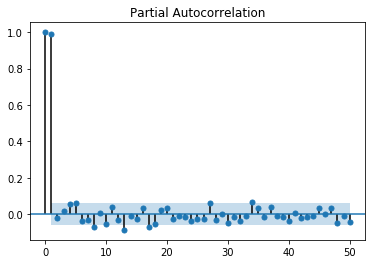

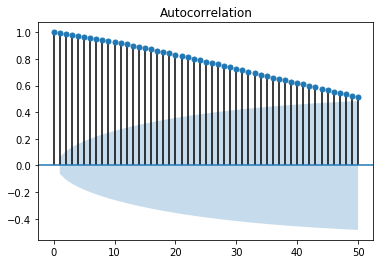

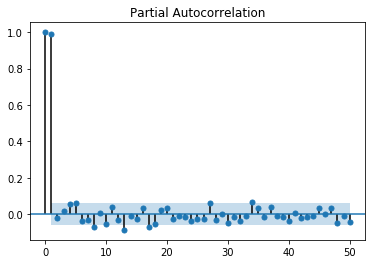

In [35]:
# Plot ACF and PACF
ibm_df=ibm_df.dropna()
plot_acf(ibm_df.Close_Price, lags=50)
plot_pacf(ibm_df.Close_Price, lags=50)

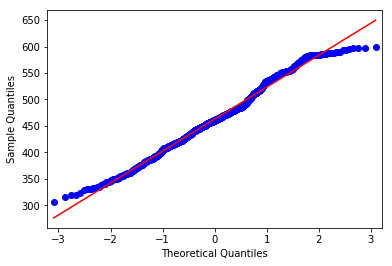

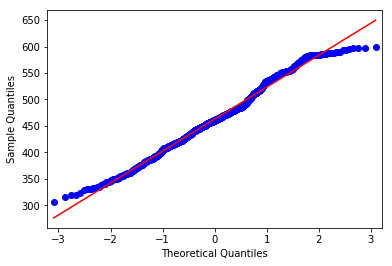

In [36]:
# QQ plot and probability plot
sm.qqplot(ibm_df['Close_Price'], line='s')

In [39]:
# Optimize ARMA parameters
aicVal=[]
for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(ari, maj)).fit(maxlag=30, method='mle', trend='nc')
        aicVal.append([ari, maj, arma_obj.aic])
        
aicVal

[[1, 0, 6702.766710082229],
 [1, 1, 6704.704833957512],
 [1, 2, 6706.643594207395],
 [2, 0, 6704.705792809062],
 [2, 1, 6705.736896922092],
 [2, 2, 6707.728881258643]]

In [41]:
arma_obj_fin = smtsa.ARMA(ibm_df.Close_Price.tolist(), order=(1, 0)).fit(maxlag=30, method='mle', trend='nc')
ibm_df['ARMA']=arma_obj_fin.predict()
arma_obj_fin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1008
Model:                     ARMA(1, 0)   Log Likelihood               -3349.383
Method:                           mle   S.D. of innovations              6.683
Date:                Tue, 07 May 2019   AIC                           6702.767
Time:                        17:09:45   BIC                           6712.598
Sample:                             0   HQIC                          6706.502
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9999      0.000   9222.316      0.000       1.000       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0, 0.5, 'Closing price')

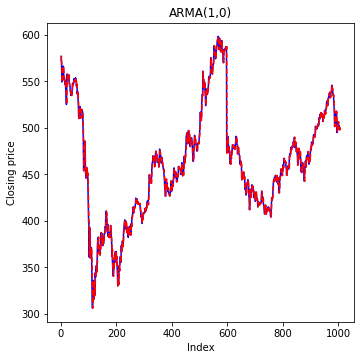

In [43]:
# Plot the curves
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price')

## Chapter 4: Auto-regressive integrated moving average (ARIMA) Box-Jenkins

In [45]:
#Load Modules
from __future__ import print_function
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [57]:
#Read data from Excel file
djia_df = pd.read_excel('DJIA_Jan2016_Dec2016.xlsx')
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


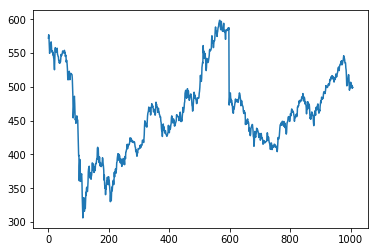

In [58]:
#Rename the second column
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()
ibm_df.Close_Price.plot()

In [59]:
#Let us parse the Date column and use as row index 
#for the DataFrame and drop it as a column
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)

In [60]:
#Let us see first few rows of the modified DataFrame
djia_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000


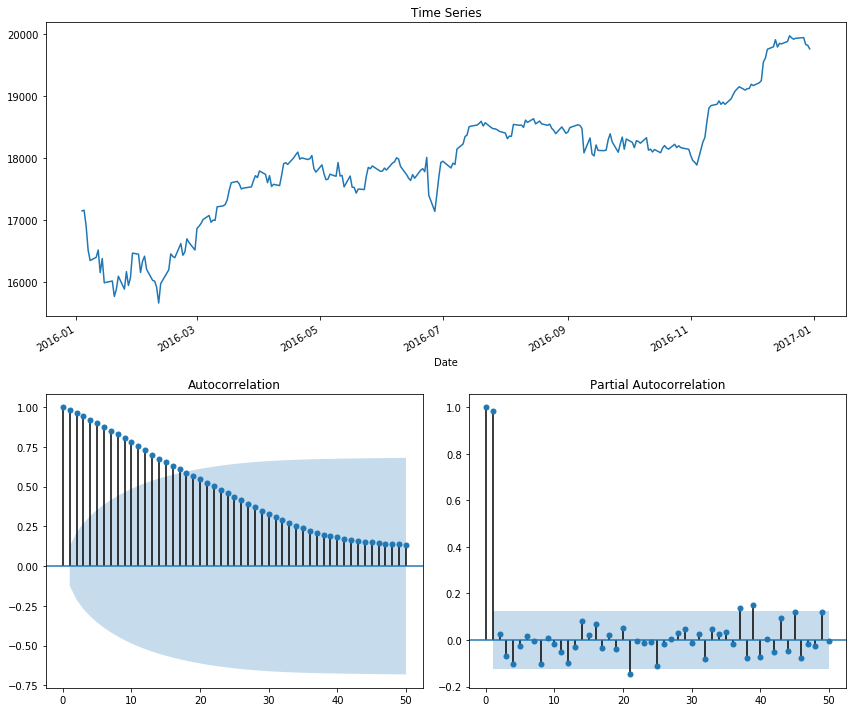

In [61]:
# Plot ACF and PACF
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

In [62]:
# Evaluate mean and variance at mid values
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


In [63]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


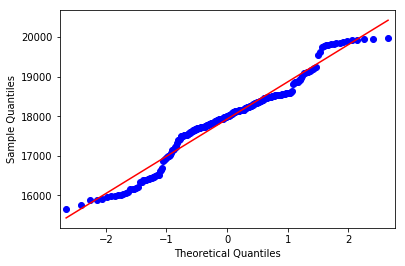

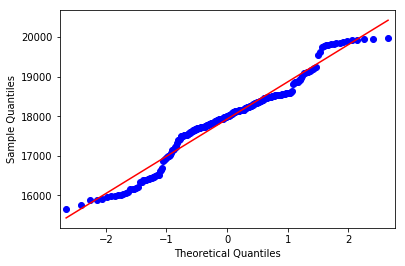

In [64]:
# QQ plot and probability plot
sm.qqplot(djia_df['Close'], line='s')

In [65]:
# Optimize ARMA parameters (Will return a non-stationary error)
arma_obj = smtsa.ARMA(djia_df['Close'].tolist(), order=(1, 1)).fit(maxlag=30, method='mle', trend='nc')


ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

Text(0.5, 1.0, 'First-order differences of DJIA during Jan 2016-Dec 2016')

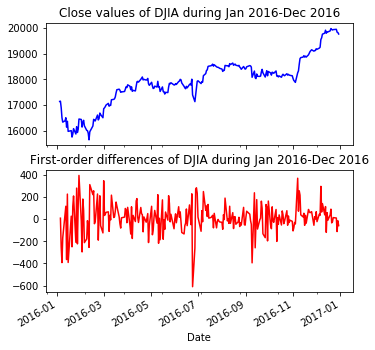

In [66]:
#Let us plot the original time series and first-differences
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016')


ADF Statistic: -17.135094
p-value: 0.000000


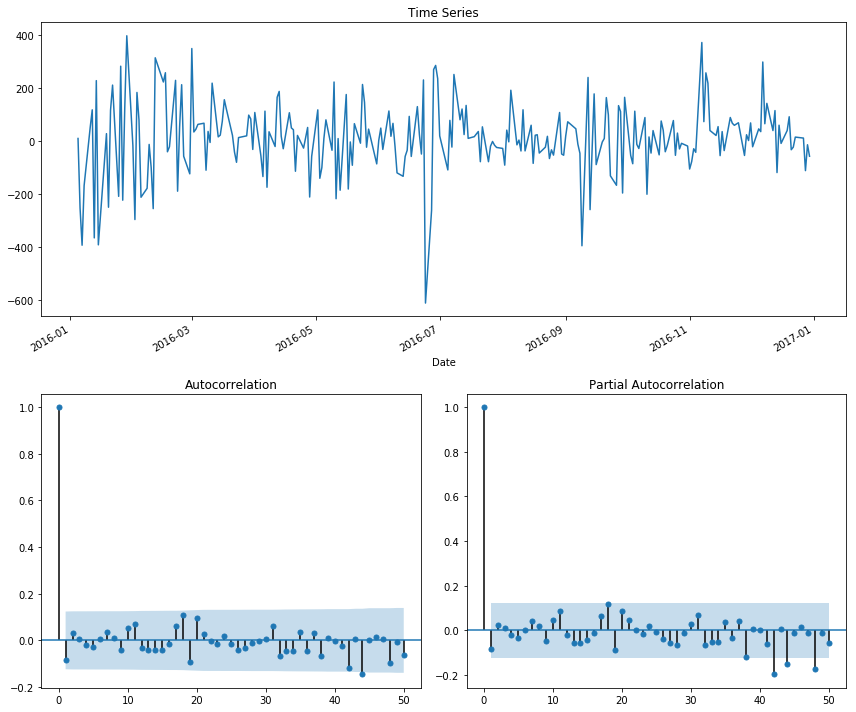

In [67]:
# plot signal
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

In [70]:
# Optimize ARMA parameters
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = ARIMA(djia_df['Close'].tolist(), order=(ari,d,maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass
aicVal

[[0, 1, 0, 3182.6357271384236],
 [0, 1, 1, 3182.931550316123],
 [0, 1, 2, 3184.662278666937],
 [1, 1, 0, 3182.83715277997],
 [1, 1, 1, 3184.7361515062103],
 [2, 1, 0, 3184.6953586865197],
 [2, 1, 1, 3186.7685269724097],
 [2, 1, 2, 3188.7125454990423],
 [0, 2, 0, 3364.451294991992],
 [0, 2, 1, 3177.7694610648687],
 [1, 2, 0, 3274.734897745876],
 [1, 2, 1, 3177.995313608747],
 [1, 2, 2, 3179.888768554125],
 [2, 2, 0, 3242.247697021925],
 [2, 2, 1, 3179.841284646488],
 [2, 2, 2, 3180.9382858917097]]

In [69]:
# Optimal ARIMA model
arima_obj = ARIMA(djia_df['Close'].tolist(), order=(0,2,1))
arima_obj_fit = arima_obj.fit(disp=0)
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  250
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1585.885
Method:                       css-mle   S.D. of innovations            136.122
Date:                Tue, 07 May 2019   AIC                           3177.769
Time:                        17:15:41   BIC                           3188.334
Sample:                             2   HQIC                          3182.021
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1011      0.119      0.853      0.395      -0.131       0.334
ma.L1.D2.y    -1.0000      0.012    -81.004      0.000      -1.024      -0.976
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [71]:
# Evaluate prediction
pred=np.append([0,0],arima_obj_fit.fittedvalues.tolist())
djia_df['ARIMA']=pred
diffval=np.append([0,0], arima_obj_fit.resid+arima_obj_fit.fittedvalues)
djia_df['diffval']=diffval

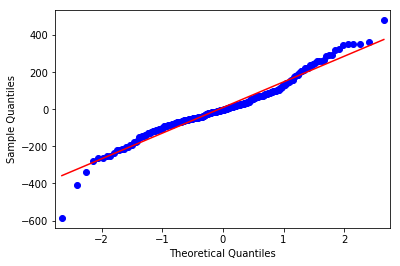

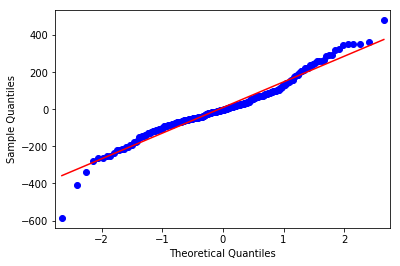

In [72]:
# QQ plot and probability plot
sm.qqplot(arima_obj_fit.resid, line='s')

Text(0, 0.5, 'Closing')

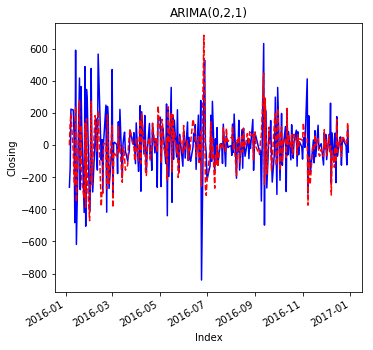

In [73]:
# Plot output
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['diffval'].iloc[2:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[2:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing')

Text(0, 0.5, 'Forecasted value')

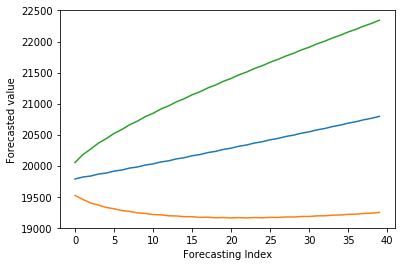

In [116]:
# Forecasting and Confidence Interval (CI) 
f, err, ci=arima_obj_fit.forecast(40) 
plt.plot(f) 
plt.plot(ci) 
plt.xlabel('Forecasting Index') 
plt.ylabel('Forecasted value') 

In [117]:
# SARIMAX MODEL
# Seasonality (based on first difference ACF shows significance at 42 lag)
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0,2,1), seasonal_order=(1,1,1,42))
sarimax= mod.fit()
sarimax.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Tue, 07 May 2019   AIC                           2741.141
Time:                                    17:23:32   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.167     -0.062      0.951     -32.686      30.687
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (Q):                       31.80   Jarque-Bera (JB):                21.28
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""